
Matrice d’interconnexion entre lignes :

ligne_2  A01191  A01192  A01193  A01516  A01534  A01535  A01536  A01537  \
ligne_1                                                                   
/             8       3      12       2      14      10      11      14   
A01191        0       0       0       0       0       0       0       0   
A01192        0       0       0       0       1       0       0       0   
A01193        0       0       0       0       1       0       0       1   
A01516        0       0       0       0       0       0       0       0   
A01534        0       0       0       0       0       2       0       1   
A01535        0       0       0       0       0       0       2       1   
A01536        0       0       0       0       0       0       0       1   
A01537        0       0       0       0       0       0       0       0   
A01538        0       0       0       0       0       0       0       0   
A01539        0       0       0       0       0       0   

/var/folders/79/75kpj7sx7qlbhtz8l6x_tcpm0000gn/T/ipykernel_2916/2968172060.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


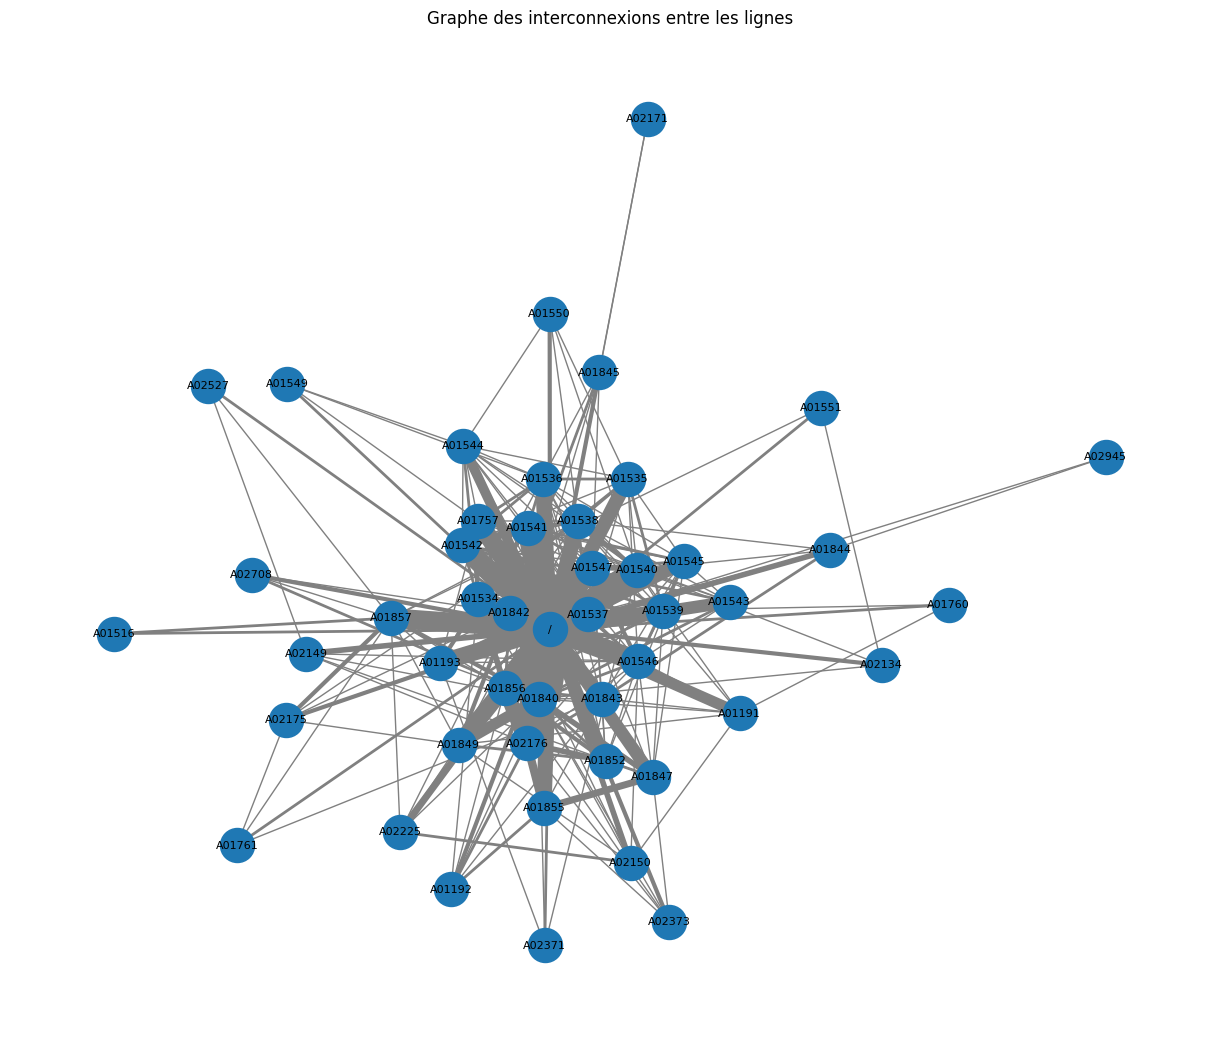

In [ ]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_csv("emplacement-des-gares-idf-data-generalisee.csv", sep=';')

# Extraire les identifiants de ligne
df = df.dropna(subset=['idrefliga'])
df['idrefliga'] = df['idrefliga'].astype(str)
df['liste_lignes'] = df['idrefliga'].apply(lambda x: x.split())

# Construire les paires d’interconnexions par gare
connexions = []
for lignes in df['liste_lignes']:
    if len(lignes) > 1:
        connexions.extend(combinations(sorted(set(lignes)), 2))

# Compter les connexions 
connexions_df = pd.DataFrame(connexions, columns=['ligne_1', 'ligne_2'])
matrice = connexions_df.value_counts().unstack(fill_value=0)

# Afficher la matrice
print("\nMatrice d’interconnexion entre lignes :\n")
print(matrice.fillna(0).astype(int))

lignes_par_transport = {}

types_transport = ['rer', 'metro', 'tramway', 'train']
valeurs_par_type = {t: df[t].unique().tolist() for t in types_transport}
for t in types_transport:
    lignes_presentes = df[df[t] == 1]['liste_lignes'].explode().unique()
    lignes_par_transport[t] = len(lignes_presentes)

print(lignes_par_transport)

# Visualisation du graphe d’interconnexions
G = nx.Graph()
for (ligne1, ligne2), count in connexions_df.value_counts().items():
    G.add_edge(ligne1, ligne2, weight=count)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=600, width=weights, edge_color='gray', font_size=8)
plt.title("Graphe des interconnexions entre les lignes")
plt.tight_layout()
plt.show()
